In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date


start by reading the CSV file and clean the data

In [49]:
df_dkk_euro_original = pd.read_csv('C:\\Users\\SonjaMehes\\Documents\\PythonExchangeRate\\csv_files\\data_dkk.csv', skiprows=4)


In [32]:
df_dkk_euro_original

,Period\Unit:,[Danish krone ]
0,2023-09-01,7.4528
1,2023-08-31,7.4523
2,2023-08-30,7.4531
3,2023-08-29,7.4529
4,2023-08-28,7.4530
...,...,...
1267,2018-09-24,7.4597
1268,2018-09-21,7.4597
1269,2018-09-20,7.4592
1270,2018-09-19,7.4597


- renaming the column 'Period\\Unit' to 'date'
- clean - remove records that have NaN values
- add a new column called 'date' that contains the index values of the dataframe (in our case, the index column had the dates)
- creating a plot of the data in the 'df_uk_euro' that has 'date' as the x-axis and 'DKK' as the y-axis
- observe the DKK currency against the euro

In [33]:
df_dkk_euro_original.rename(columns={'Period\\Unit:': 'date', '[Danish krone ]': 'DKK'}, inplace=True)


In [34]:
df_dkk_euro_original

,date,DKK
0,2023-09-01,7.4528
1,2023-08-31,7.4523
2,2023-08-30,7.4531
3,2023-08-29,7.4529
4,2023-08-28,7.4530
...,...,...
1267,2018-09-24,7.4597
1268,2018-09-21,7.4597
1269,2018-09-20,7.4592
1270,2018-09-19,7.4597


In [35]:
df_dkk_euro_original.dtypes

date     object
DKK     float64
dtype: object

In [36]:
#casting 'date' to a datetime data type
date = pd.to_datetime(df_dkk_euro_original['date'])
df_dkk_euro_original['date'] = date
df_dkk_euro_original.head()

,date,DKK
0,2023-09-01,7.4528
1,2023-08-31,7.4523
2,2023-08-30,7.4531
3,2023-08-29,7.4529
4,2023-08-28,7.4530


In [37]:
df_dkk_euro_original.dtypes

date    datetime64[ns]
DKK            float64
dtype: object

In [38]:
#filter it to show only data from 2018 onwards
df_dkk_euro_original['date'] = pd.to_datetime(df_dkk_euro_original['date'])
df_dkk_euro_original = df_dkk_euro_original[df_dkk_euro_original['date'] >= '2018-01-01']
df_dkk_euro_original.dtypes

date    datetime64[ns]
DKK            float64
dtype: object

Calculating the highest and the lowest depriciation against euro (the highest and the lowest historical value in the dataset)

<Axes: xlabel='date'>

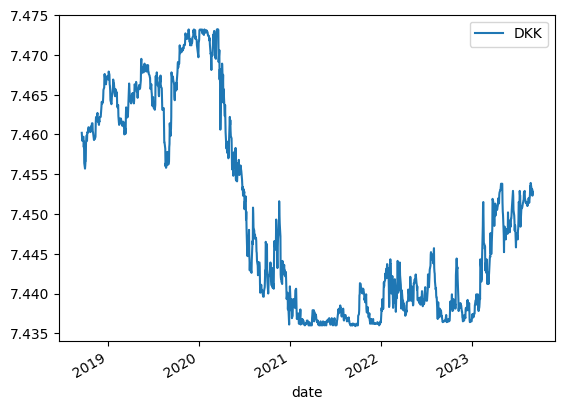

In [39]:
df_dkk_euro_original.plot(x='date', y=['DKK'])

Max val of 7.473 at date 889
Min val of 7.436 at date 503


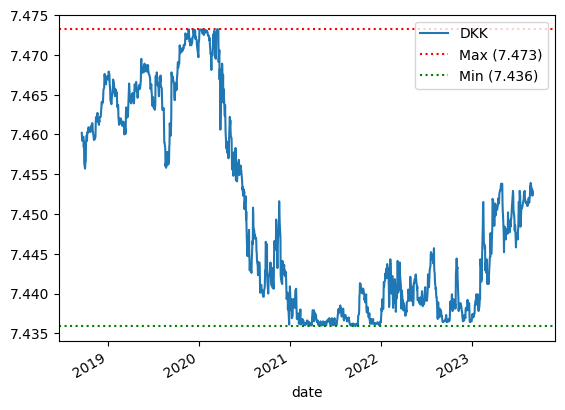

In [40]:
# Plot the DataFrame
ax = df_dkk_euro_original.plot(x='date', y=['DKK'])

# Calculate maximum and minimum values and their indices
max_val = df_dkk_euro_original['DKK'].max()
max_idx = df_dkk_euro_original['DKK'].idxmax()
min_val = df_dkk_euro_original['DKK'].min()
min_idx = df_dkk_euro_original['DKK'].idxmin()

# Print the results
print(f"Max val of {max_val:.3f} at date {max_idx}")
print(f"Min val of {min_val:.3f} at date {min_idx}")

# Add dotted lines for maximum and minimum values
ax.axhline(max_val, color='red', linestyle='dotted', label=f'Max ({max_val:.3f})')
ax.axhline(min_val, color='green', linestyle='dotted', label=f'Min ({min_val:.3f})')

# Show the legend
ax.legend()

# Show the plot
plt.show()

- See the difference between 2 days in order to determine the highest appreciation and depreciation against Euro in one day


<Axes: >

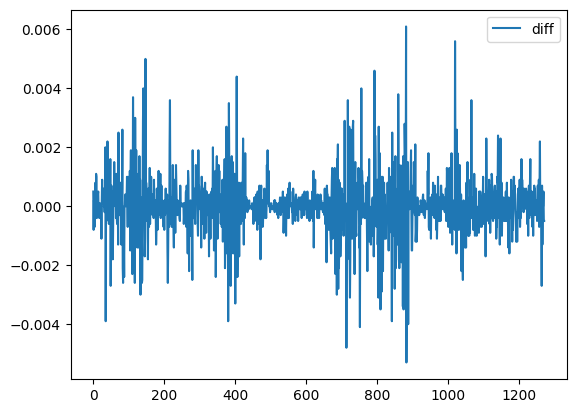

In [41]:
df_dkk_euro_original['diff'] = df_dkk_euro_original['DKK'].diff(-1)
df_dkk_euro_original.plot(y=['diff'])

<Axes: xlabel='date'>

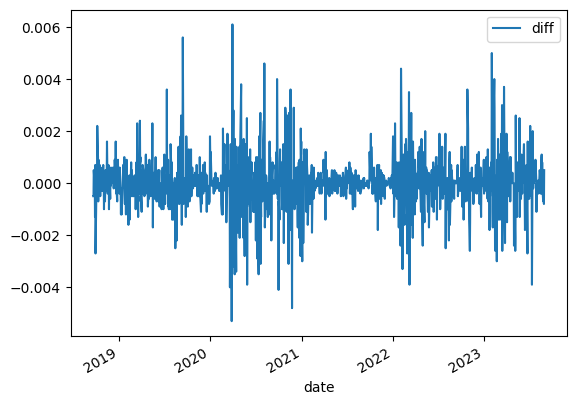

In [42]:
df_dkk_euro_original.plot(x= 'date', y = ['diff'])

In [43]:
max_date = df_dkk_euro_original['date'][df_dkk_euro_original['diff'].idxmax()]
min_date = df_dkk_euro_original['date'][df_dkk_euro_original['diff'].idxmin()]

print("Date for Max Value:", max_date)
print("Date for Min Value:", min_date)

Date for Max Value: 2020-03-30 00:00:00
Date for Min Value: 2020-03-27 00:00:00


- Adding on a plot the min and max values representing the biggest depreciation and appreciation in one day 

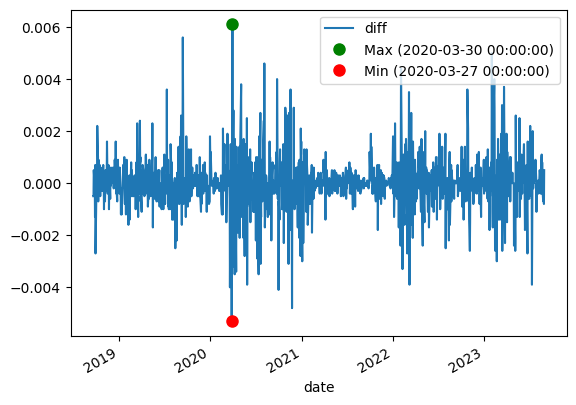

In [44]:

max_date = df_dkk_euro_original['date'][df_dkk_euro_original['diff'].idxmax()]
min_date = df_dkk_euro_original['date'][df_dkk_euro_original['diff'].idxmin()]

# Create the plot
ax = df_dkk_euro_original.plot(x='date', y=['diff'], legend=False)

# Add markers for the max and min values
ax.plot(max_date, df_dkk_euro_original['diff'].max(), marker='o', markersize=8, label=f'Max ({max_date})', linestyle='', color='green')
ax.plot(min_date, df_dkk_euro_original['diff'].min(), marker='o', markersize=8, label=f'Min ({min_date})', linestyle='', color='red')

# Add legend
plt.legend()

# Show the plot
plt.show()